Enter the number of queens:  6


Total Solutions for 6-Queens: 4

. Q . . . .
. . . Q . .
. . . . . Q
Q . . . . .
. . Q . . .
. . . . Q .




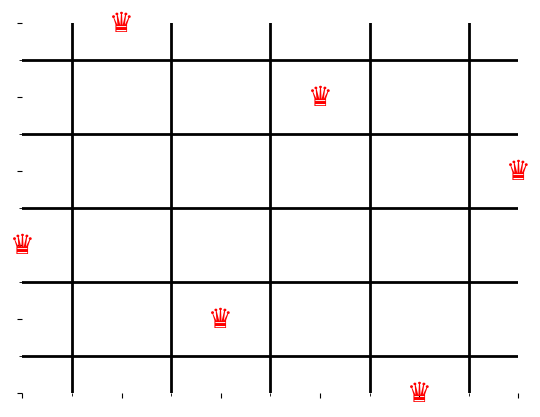

. . Q . . .
. . . . . Q
. Q . . . .
. . . . Q .
Q . . . . .
. . . Q . .




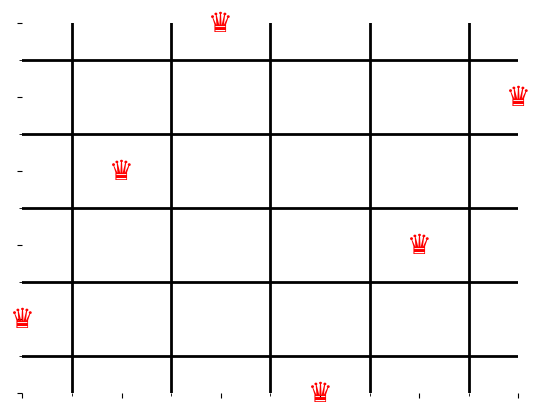

. . . Q . .
Q . . . . .
. . . . Q .
. Q . . . .
. . . . . Q
. . Q . . .




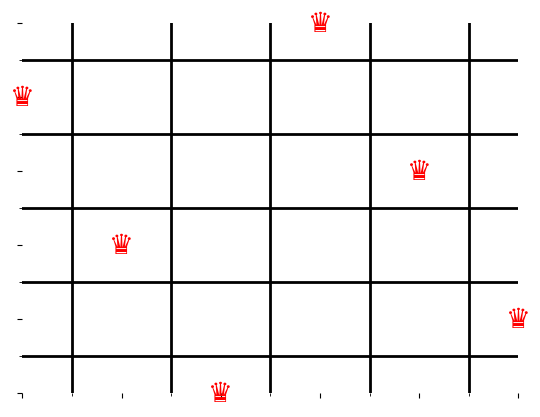

. . . . Q .
. . Q . . .
Q . . . . .
. . . . . Q
. . . Q . .
. Q . . . .




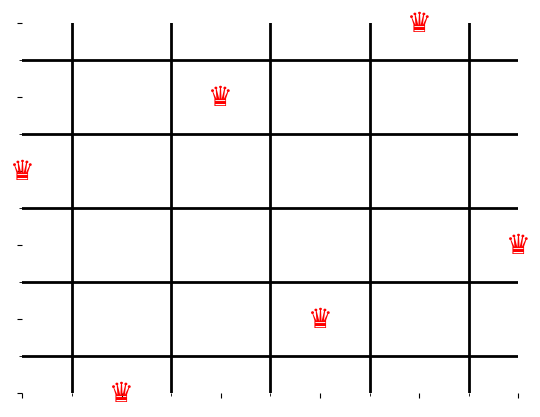

In [1]:
import matplotlib.pyplot as plt

def is_safe(board, row, col, n):
    """Check if a queen can be placed at board[row][col]."""
    for i in range(row):
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

def solve_n_queens(n, row=0, board=[], solutions=[]):
    """Recursive function to solve the N-Queens problem dynamically."""
    if row == n:
        solutions.append(board[:])
        return
    
    for col in range(n):
        if is_safe(board, row, col, n):
            board.append(col)
            solve_n_queens(n, row + 1, board, solutions)
            board.pop()
    
    return solutions

def display_board(solution, n):
    """Visualize the N-Queens board using Matplotlib."""
    board = [[0] * n for _ in range(n)]
    for i in range(n):
        board[i][solution[i]] = 1
    
    fig, ax = plt.subplots()
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.set_xticks([x - 0.5 for x in range(1, n)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, n)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    
    for i in range(n):
        for j in range(n):
            if board[i][j] == 1:
                ax.text(j, i, "♛", fontsize=20, ha='center', va='center', color='red')
    
    plt.gca().invert_yaxis()
    plt.show()

def print_solutions(solutions, n):
    """Format and print all solutions and display them visually."""
    for sol in solutions:
        for row in sol:
            line = ['.'] * n
            line[row] = 'Q'
            print(" ".join(line))
        print("\n")
        display_board(sol, n)

if __name__ == "__main__":
    try:
        n = int(input("Enter the number of queens: "))
        if n <= 0:
            raise ValueError("Number of queens must be a positive integer.")
        solutions = solve_n_queens(n)
        print(f"Total Solutions for {n}-Queens: {len(solutions)}\n")
        print_solutions(solutions, n)
    except ValueError as e:
        print(f"Invalid input: {e}")
